In [19]:
% reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


This script is to reproduce the main results for Early-career setback and future career impact. The results contain:

<ol>
<p> 1) Comparing near misses with near winners in terms of hit rate per paper;
<p> 2) Comparing near misses with near winners in terms of average citations (C5) per paper;
<p> 3) Comparing near misses with near winners in terms of probability to publish a clinical paper;
<p> 4) Comparing near misses with near winners in terms of probability to publish a translational research;
<p> 5) Comparing near misses with near winners in terms of publishing a paper that is cited by clinical trials.

</ol>
Near misses are represented using orange color, and near winners are represented using blue color. 

This paper makes use of restricted access data from the National Institutes of Health, protected by the Privacy Act of 1974 as amended (5 U.S.C. 552a). 

# load packages

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import sys
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
PATH_data = '/Users/yangwang/Dropbox/funding/RDD/RDD_code/key_code/code_public/data/'  # customize your path
%matplotlib inline

# compare near misses with near winners in terms of hit rate per paper

In [21]:
def read_hit_data():
    # hit status for 1-10 years
    df_hit_all = pd.read_csv(PATH_data + 'df_hit_all.csv', index_col=0)
    hit_status_win_all = df_hit_all[df_hit_all['funding'] == 1].hit.values.tolist()
    hit_status_miss_all = df_hit_all[df_hit_all['funding'] == 0].hit.values.tolist()
    
    # hit status for 1-5 years
    df_hit_early = pd.read_csv(PATH_data + 'df_hit_early.csv', index_col=0)
    hit_status_win_early = df_hit_early[df_hit_early['funding'] == 1].hit.values.tolist()
    hit_status_miss_early = df_hit_early[df_hit_early['funding'] == 0].hit.values.tolist()
    
    # hit status for 6-10 years
    df_hit_late = pd.read_csv(PATH_data + 'df_hit_late.csv', index_col=0)
    hit_status_win_late = df_hit_late[df_hit_late['funding'] == 1].hit.values.tolist()
    hit_status_miss_late = df_hit_late[df_hit_late['funding'] == 0].hit.values.tolist()

    # statistics for 1-10 years
    ave_prob_hit_win_all = np.mean(hit_status_win_all)
    ave_prob_hit_miss_all = np.mean(hit_status_miss_all)
    std_prob_hit_win_all = np.std(hit_status_win_all) / float(np.sqrt(len(hit_status_win_all)))
    std_prob_hit_miss_all = np.std(hit_status_miss_all) / float(np.sqrt(len(hit_status_miss_all)))

    # statistics for 1-5 years
    ave_prob_hit_win_early = np.mean(hit_status_win_early)
    ave_prob_hit_miss_early = np.mean(hit_status_miss_early)
    std_prob_hit_win_early = np.std(hit_status_win_early) / float(np.sqrt(len(hit_status_win_early)))
    std_prob_hit_miss_early = np.std(hit_status_miss_early) / float(np.sqrt(len(hit_status_miss_early)))

    # statistics for 6-10 years
    ave_prob_hit_win_late = np.mean(hit_status_win_late)
    ave_prob_hit_miss_late = np.mean(hit_status_miss_late)
    std_prob_hit_win_late = np.std(hit_status_win_late) / float(np.sqrt(len(hit_status_win_late)))
    std_prob_hit_miss_late = np.std(hit_status_miss_late) / float(np.sqrt(len(hit_status_miss_late)))

    para = {"ave_prob_hit_win": [ave_prob_hit_win_early, ave_prob_hit_win_late, ave_prob_hit_win_all],
            "ave_prob_hit_miss": [ave_prob_hit_miss_early, ave_prob_hit_miss_late, ave_prob_hit_miss_all],
            "std_prob_hit_win": [std_prob_hit_win_early, std_prob_hit_win_late, std_prob_hit_win_all],
            "std_prob_hit_miss": [std_prob_hit_miss_early, std_prob_hit_miss_late, std_prob_hit_miss_all],
           }
    
    return para


def read_hit_data_removal():
    # hit status for 1-10 years
    df_hit_all = pd.read_csv(PATH_data + 'df_hit_all_removal.csv', index_col=0)
    hit_status_win_all = df_hit_all[df_hit_all['funding'] == 1].hit.values.tolist()
    hit_status_miss_all = df_hit_all[df_hit_all['funding'] == 0].hit.values.tolist()
        
    # hit status for 1-5 years
    df_hit_early = pd.read_csv(PATH_data + 'df_hit_early_removal.csv', index_col=0)
    hit_status_win_early = df_hit_early[df_hit_early['funding'] == 1].hit.values.tolist()
    hit_status_miss_early = df_hit_early[df_hit_early['funding'] == 0].hit.values.tolist()

    # hit status for 6-10 years
    df_hit_late = pd.read_csv(PATH_data + 'df_hit_late_removal.csv', index_col=0)
    hit_status_win_late = df_hit_late[df_hit_late['funding'] == 1].hit.values.tolist()
    hit_status_miss_late = df_hit_late[df_hit_late['funding'] == 0].hit.values.tolist()

    # statistics for 1-10 years
    ave_prob_hit_win_all = np.mean(hit_status_win_all)
    ave_prob_hit_miss_all = np.mean(hit_status_miss_all)
    std_prob_hit_win_all = np.std(hit_status_win_all) / float(np.sqrt(len(hit_status_win_all)))
    std_prob_hit_miss_all = np.std(hit_status_miss_all) / float(np.sqrt(len(hit_status_miss_all)))

    # statistics for 1-5 years
    ave_prob_hit_win_early = np.mean(hit_status_win_early)
    ave_prob_hit_miss_early = np.mean(hit_status_miss_early)
    std_prob_hit_win_early = np.std(hit_status_win_early) / float(np.sqrt(len(hit_status_win_early)))
    std_prob_hit_miss_early = np.std(hit_status_miss_early) / float(np.sqrt(len(hit_status_miss_early)))

    # statistics for 6-10 years
    ave_prob_hit_win_late = np.mean(hit_status_win_late)
    ave_prob_hit_miss_late = np.mean(hit_status_miss_late)
    std_prob_hit_win_late = np.std(hit_status_win_late) / float(np.sqrt(len(hit_status_win_late)))
    std_prob_hit_miss_late = np.std(hit_status_miss_late) / float(np.sqrt(len(hit_status_miss_late)))

    para = {"ave_prob_hit_win": [ave_prob_hit_win_early, ave_prob_hit_win_late, ave_prob_hit_win_all],
            "ave_prob_hit_miss": [ave_prob_hit_miss_early, ave_prob_hit_miss_late, ave_prob_hit_miss_all],
            "std_prob_hit_win": [std_prob_hit_win_early, std_prob_hit_win_late, std_prob_hit_win_all],
            "std_prob_hit_miss": [std_prob_hit_miss_early, std_prob_hit_miss_late, std_prob_hit_miss_all],
           }
    
    return para


def draw_figures_split_2_new(para):

    import matplotlib.gridspec as gridspec

    def _draw_figures_2(pos_x, ave_win, ave_miss, std_win, std_miss, ax):
        """
        local function to draw figures
        """

        def label_diff(i, text, X, Y):
            y = max(Y[0], Y[1])
            ax.text(i, y, text, horizontalalignment='center', fontsize=50)

        ind = np.array([pos_x])  # the x locations for the groups
        ax.errorbar(ind - 0.15, ave_win, yerr=np.array(std_win), alpha=.8, ecolor='#30B0D2', color='#30B0D2', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near win stay')
        ax.errorbar(ind + 0.15, ave_miss, yerr=np.array(std_miss), alpha=.8, ecolor='#FD7400', color='#FD7400', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near miss stay')

        return ax

    def _fig_axis(ax):
        """
        Change figure axis properties.
        """
        ax.tick_params(direction='out', length=6, width=2, labelsize=20)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.yaxis.set_ticks_position('none')
        
        return ax
    
    hfont = {'fontname': 'Helvetica'}
    
    fig = plt.figure(figsize=(6, 5))
    gs1 = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    # ax1 P(hit) from 1-5, 6-10
    ax1 = fig.add_subplot(gs1[0])
    ax1 = _draw_figures_2(1, para['ave_prob_hit_win'][0], para['ave_prob_hit_miss'][0], para['std_prob_hit_win'][0], para['std_prob_hit_miss'][0], ax1)
    ax1 = _draw_figures_2(2, para['ave_prob_hit_win'][1], para['ave_prob_hit_miss'][1], para['std_prob_hit_win'][1], para['std_prob_hit_miss'][1], ax1)
    ax1.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax1.axvspan(1.51, 2.5, alpha=0.25, color='0.5')
    ax1 = _fig_axis(ax1)
    ax1.set_xticks(np.array([1, 2, 3]))
    ax1.set_xticklabels((r'1$\sim$5', r'6$\sim$10'))
    ax1.set_xlim(.5, 2.5)
    ax1.set_ylabel(r'$\#$hits $/$ $\#$papers', fontsize=25, **hfont)
    ax1.yaxis.grid(True, linestyle=':')
    ax1.set_ylim(.12, .18)
    
    # ax2 P(hit) from 1-10
    ax2 = fig.add_subplot(gs1[1])
    ax2 = _draw_figures_2(1, para['ave_prob_hit_win'][2], para['ave_prob_hit_miss'][2], para['std_prob_hit_win'][2], para['std_prob_hit_miss'][2], ax2)
    ax2.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax2 = _fig_axis(ax2)
    ax2.set_xticklabels(('', r'1$\sim$10'))
    ax2.yaxis.grid(True, linestyle=':')
    ax2.set_xlim(.5, 1.5)
    gs1.tight_layout(fig, rect=[0, None, 1, None])
    ax2.set_ylim(.12, .18)
    
    return None

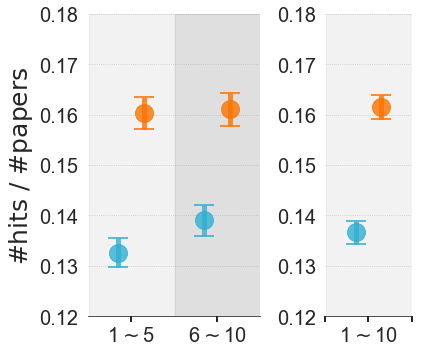

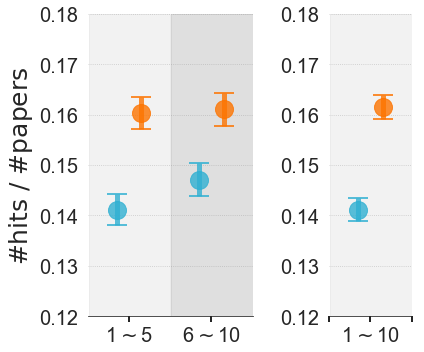

In [22]:
# plot figures
para = read_hit_data()
para_removal = read_hit_data_removal()

draw_figures_split_2_new(para)
draw_figures_split_2_new(para_removal)

# compare near misses with near winners in terms of average citations per paper 

In [23]:
def read_citation_data():

    # hit status for 1-10 years
    df_citation_all = pd.read_csv(PATH_data + 'df_citation_all.csv', index_col=0)
    citation_status_win_all = df_citation_all[df_citation_all['funding'] == 1].citation.values.tolist()
    citation_status_miss_all = df_citation_all[df_citation_all['funding'] == 0].citation.values.tolist()

    # hit status for 1-5 years
    df_citation_early = pd.read_csv(PATH_data + 'df_citation_early.csv', index_col=0)
    citation_status_win_early = df_citation_early[df_citation_early['funding'] == 1].citation.values.tolist()
    citation_status_miss_early = df_citation_early[df_citation_early['funding'] == 0].citation.values.tolist()

    # hit status for 6-10 years
    df_citation_late = pd.read_csv(PATH_data + 'df_citation_late.csv', index_col=0)
    citation_status_win_late = df_citation_late[df_citation_late['funding'] == 1].citation.values.tolist()
    citation_status_miss_late = df_citation_late[df_citation_late['funding'] == 0].citation.values.tolist()
    
    # statistics for 1-10 years
    ave_citation_win_all = np.mean(citation_status_win_all)
    ave_citation_miss_all = np.mean(citation_status_miss_all)
    std_citation_win_all = np.std(citation_status_win_all) / float(np.sqrt(len(citation_status_win_all)))
    std_citation_miss_all = np.std(citation_status_miss_all) / float(np.sqrt(len(citation_status_miss_all)))

    # statistics for 1-5 years
    ave_citation_win_early = np.mean(citation_status_win_early)
    ave_citation_miss_early = np.mean(citation_status_miss_early)
    std_citation_win_early = np.std(citation_status_win_early) / float(np.sqrt(len(citation_status_win_early)))
    std_citation_miss_early = np.std(citation_status_miss_early) / float(np.sqrt(len(citation_status_miss_early)))

    # statistics for 6-10 years
    ave_citation_win_late = np.mean(citation_status_win_late)
    ave_citation_miss_late = np.mean(citation_status_miss_late)
    std_citation_win_late = np.std(citation_status_win_late) / float(np.sqrt(len(citation_status_win_late)))
    std_citation_miss_late = np.std(citation_status_miss_late) / float(np.sqrt(len(citation_status_miss_late)))

    para = {"ave_citation_win": [ave_citation_win_early, ave_citation_win_late, ave_citation_win_all],
            "ave_citation_miss": [ave_citation_miss_early, ave_citation_miss_late, ave_citation_miss_all],
            "std_citation_win": [std_citation_win_early, std_citation_win_late, std_citation_win_all],
            "std_citation_miss": [std_citation_miss_early, std_citation_miss_late, std_citation_miss_all],
           }
    
    return para


def read_citation_data_removal():

    # hit status for 1-10 years
    df_citation_all = pd.read_csv(PATH_data + 'df_citation_all_removal.csv', index_col=0)
    citation_status_win_all = df_citation_all[df_citation_all['funding'] == 1].citation.values.tolist()
    citation_status_miss_all = df_citation_all[df_citation_all['funding'] == 0].citation.values.tolist()

    # hit status for 1-5 years
    df_citation_early = pd.read_csv(PATH_data + 'df_citation_early_removal.csv', index_col=0)
    citation_status_win_early = df_citation_early[df_citation_early['funding'] == 1].citation.values.tolist()
    citation_status_miss_early = df_citation_early[df_citation_early['funding'] == 0].citation.values.tolist()

    # hit status for 6-10 years
    df_citation_late = pd.read_csv(PATH_data + 'df_citation_late_removal.csv', index_col=0)
    citation_status_win_late = df_citation_late[df_citation_late['funding'] == 1].citation.values.tolist()
    citation_status_miss_late = df_citation_late[df_citation_late['funding'] == 0].citation.values.tolist()
    
    # statistics for 1-10 years
    ave_citation_win_all = np.mean(citation_status_win_all)
    ave_citation_miss_all = np.mean(citation_status_miss_all)
    std_citation_win_all = np.std(citation_status_win_all) / float(np.sqrt(len(citation_status_win_all)))
    std_citation_miss_all = np.std(citation_status_miss_all) / float(np.sqrt(len(citation_status_miss_all)))

    # statistics for 1-5 years
    ave_citation_win_early = np.mean(citation_status_win_early)
    ave_citation_miss_early = np.mean(citation_status_miss_early)
    std_citation_win_early = np.std(citation_status_win_early) / float(np.sqrt(len(citation_status_win_early)))
    std_citation_miss_early = np.std(citation_status_miss_early) / float(np.sqrt(len(citation_status_miss_early)))

    # statistics for 6-10 years
    ave_citation_win_late = np.mean(citation_status_win_late)
    ave_citation_miss_late = np.mean(citation_status_miss_late)
    std_citation_win_late = np.std(citation_status_win_late) / float(np.sqrt(len(citation_status_win_late)))
    std_citation_miss_late = np.std(citation_status_miss_late) / float(np.sqrt(len(citation_status_miss_late)))

    para = {"ave_citation_win": [ave_citation_win_early, ave_citation_win_late, ave_citation_win_all],
            "ave_citation_miss": [ave_citation_miss_early, ave_citation_miss_late, ave_citation_miss_all],
            "std_citation_win": [std_citation_win_early, std_citation_win_late, std_citation_win_all],
            "std_citation_miss": [std_citation_miss_early, std_citation_miss_late, std_citation_miss_all],
           }
    
    return para


def draw_figures_split_2_new(para):

    import matplotlib.gridspec as gridspec

    def _draw_figures_2(pos_x, ave_win, ave_miss, std_win, std_miss, ax):
        """
        local function to draw figures
        """

        def label_diff(i, text, X, Y):
            y = max(Y[0], Y[1])
            ax.text(i, y, text, horizontalalignment='center', fontsize=50)

        ind = np.array([pos_x])  # the x locations for the groups
        ax.errorbar(ind - 0.15, ave_win, yerr=np.array(std_win), alpha=.8, ecolor='#30B0D2', color='#30B0D2', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near win stay')
        ax.errorbar(ind + 0.15, ave_miss, yerr=np.array(std_miss), alpha=.8, ecolor='#FD7400', color='#FD7400', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near miss stay')

        return ax

    def _fig_axis(ax):
        """
        Change figure axis properties.
        """
        ax.tick_params(direction='out', length=6, width=2, labelsize=20)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.yaxis.set_ticks_position('none')
        
        return ax
    
    hfont = {'fontname': 'Helvetica'}
    
    fig = plt.figure(figsize=(6, 5))
    gs2 = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    # ax3 citations from 1-5, 6-10
    ax1 = fig.add_subplot(gs2[0])
    ax1 = _draw_figures_2(1, para['ave_citation_win'][0], para['ave_citation_miss'][0], para['std_citation_win'][0], para['std_citation_miss'][0], ax1)
    ax1 = _draw_figures_2(2, para['ave_citation_win'][1], para['ave_citation_miss'][1], para['std_citation_win'][1], para['std_citation_miss'][1], ax1)
    ax1.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax1.axvspan(1.51, 2.5, alpha=0.25, color='0.5')
    ax1 = _fig_axis(ax1)
    ax1.set_xticks(np.array([1, 2, 3]))
    ax1.set_xticklabels((r'1$\sim$5', r'6$\sim$10'))
    ax1.set_xlim(.5, 2.5)
    ax1.set_ylabel('Average Citations', fontsize=25, **hfont)
    ax1.yaxis.grid(True, linestyle=':') 
    ax1.set_ylim(25, 35)
    
    # ax4 citation from 1-10
    ax2 = fig.add_subplot(gs2[1])
    ax2 = _draw_figures_2(1, para['ave_citation_win'][2], para['ave_citation_miss'][2], para['std_citation_win'][2], para['std_citation_miss'][2], ax2)
    ax2.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax2 = _fig_axis(ax2)
    ax2.set_xlim(.5, 1.5)
    ax2.set_xticklabels(('', r'1$\sim$10'))
    ax2.yaxis.grid(True, linestyle=':')
    gs2.tight_layout(fig, rect=[0, None, 1, None])
    ax2.set_ylim(25, 35)
    
    return None

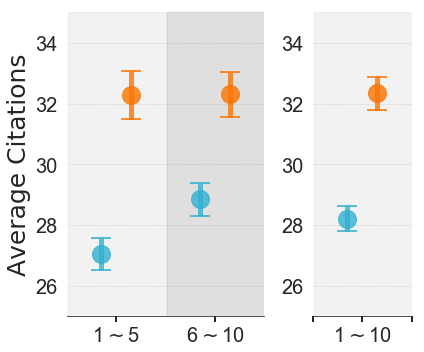

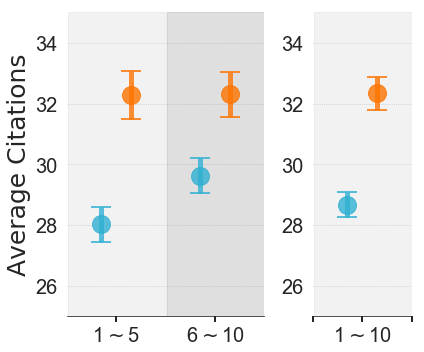

In [24]:
# plot figures
para = read_citation_data()
para_removal = read_citation_data_removal()

draw_figures_split_2_new(para)
draw_figures_split_2_new(para_removal)

# comparing near misses with near winners in terms of probability to publish clinical paper 

In [25]:
def read_clinical_data():

    # hit status for 1-10 years
    df_clinical_all = pd.read_csv(PATH_data + 'clinical_all.csv', index_col=0)
    clinical_status_win_all = df_clinical_all[df_clinical_all['funding'] == 1].clinical.values.tolist()
    clinical_status_miss_all = df_clinical_all[df_clinical_all['funding'] == 0].clinical.values.tolist()

    # hit status for 1-5 years
    df_clinical_early = pd.read_csv(PATH_data + 'clinical_early.csv', index_col=0)
    clinical_status_win_early = df_clinical_early[df_clinical_early['funding'] == 1].clinical.values.tolist()
    clinical_status_miss_early = df_clinical_early[df_clinical_early['funding'] == 0].clinical.values.tolist()

    # hit status for 6-10 years
    df_clinical_late = pd.read_csv(PATH_data + 'clinical_late.csv', index_col=0)
    clinical_status_win_late = df_clinical_late[df_clinical_late['funding'] == 1].clinical.values.tolist()
    clinical_status_miss_late = df_clinical_late[df_clinical_late['funding'] == 0].clinical.values.tolist()
    
    # statistics for 1-10 years
    ave_clinical_win_all = np.mean(clinical_status_win_all)
    ave_clinical_miss_all = np.mean(clinical_status_miss_all)
    std_clinical_win_all = np.std(clinical_status_win_all) / float(np.sqrt(len(clinical_status_win_all)))
    std_clinical_miss_all = np.std(clinical_status_miss_all) / float(np.sqrt(len(clinical_status_miss_all)))

    # statistics for 1-5 years
    ave_clinical_win_early = np.mean(clinical_status_win_early)
    ave_clinical_miss_early = np.mean(clinical_status_miss_early)
    std_clinical_win_early = np.std(clinical_status_win_early) / float(np.sqrt(len(clinical_status_win_early)))
    std_clinical_miss_early = np.std(clinical_status_miss_early) / float(np.sqrt(len(clinical_status_miss_early)))

    # statistics for 6-10 years
    ave_clinical_win_late = np.mean(clinical_status_win_late)
    ave_clinical_miss_late = np.mean(clinical_status_miss_late)
    std_clinical_win_late = np.std(clinical_status_win_late) / float(np.sqrt(len(clinical_status_win_late)))
    std_clinical_miss_late = np.std(clinical_status_miss_late) / float(np.sqrt(len(clinical_status_miss_late)))

    para = {"ave_clinical_win": [ave_clinical_win_early, ave_clinical_win_late, ave_clinical_win_all],
            "ave_clinical_miss": [ave_clinical_miss_early, ave_clinical_miss_late, ave_clinical_miss_all],
            "std_clinical_win": [std_clinical_win_early, std_clinical_win_late, std_clinical_win_all],
            "std_clinical_miss": [std_clinical_miss_early, std_clinical_miss_late, std_clinical_miss_all],
           }
    
    return para


def read_clinical_data_removal():
    # hit status for 1-10 years
    df_clinical_all = pd.read_csv(PATH_data + 'clinical_all_removal.csv', index_col=0)
    clinical_status_win_all = df_clinical_all[df_clinical_all['funding'] == 1].clinical.values.tolist()
    clinical_status_miss_all = df_clinical_all[df_clinical_all['funding'] == 0].clinical.values.tolist()

    # hit status for 1-5 years
    df_clinical_early = pd.read_csv(PATH_data + 'clinical_early_removal.csv', index_col=0)
    clinical_status_win_early = df_clinical_early[df_clinical_early['funding'] == 1].clinical.values.tolist()
    clinical_status_miss_early = df_clinical_early[df_clinical_early['funding'] == 0].clinical.values.tolist()

    # hit status for 6-10 years
    df_clinical_late = pd.read_csv(PATH_data + 'clinical_late_removal.csv', index_col=0)
    clinical_status_win_late = df_clinical_late[df_clinical_late['funding'] == 1].clinical.values.tolist()
    clinical_status_miss_late = df_clinical_late[df_clinical_late['funding'] == 0].clinical.values.tolist()

    # statistics for 1-10 years
    ave_clinical_win_all = np.mean(clinical_status_win_all)
    ave_clinical_miss_all = np.mean(clinical_status_miss_all)
    std_clinical_win_all = np.std(clinical_status_win_all) / float(np.sqrt(len(clinical_status_win_all)))
    std_clinical_miss_all = np.std(clinical_status_miss_all) / float(np.sqrt(len(clinical_status_miss_all)))

    # statistics for 1-5 years
    ave_clinical_win_early = np.mean(clinical_status_win_early)
    ave_clinical_miss_early = np.mean(clinical_status_miss_early)
    std_clinical_win_early = np.std(clinical_status_win_early) / float(np.sqrt(len(clinical_status_win_early)))
    std_clinical_miss_early = np.std(clinical_status_miss_early) / float(np.sqrt(len(clinical_status_miss_early)))

    # statistics for 6-10 years
    ave_clinical_win_late = np.mean(clinical_status_win_late)
    ave_clinical_miss_late = np.mean(clinical_status_miss_late)
    std_clinical_win_late = np.std(clinical_status_win_late) / float(np.sqrt(len(clinical_status_win_late)))
    std_clinical_miss_late = np.std(clinical_status_miss_late) / float(np.sqrt(len(clinical_status_miss_late)))

    para = {"ave_clinical_win": [ave_clinical_win_early, ave_clinical_win_late, ave_clinical_win_all],
            "ave_clinical_miss": [ave_clinical_miss_early, ave_clinical_miss_late, ave_clinical_miss_all],
            "std_clinical_win": [std_clinical_win_early, std_clinical_win_late, std_clinical_win_all],
            "std_clinical_miss": [std_clinical_miss_early, std_clinical_miss_late, std_clinical_miss_all],
           }
    
    return para


def draw_figures_split_2_new(para):

    import matplotlib.gridspec as gridspec

    def _draw_figures_2(pos_x, ave_win, ave_miss, std_win, std_miss, ax):
        """
        local function to draw figures
        """

        def label_diff(i, text, X, Y):
            y = max(Y[0], Y[1])
            ax.text(i, y, text, horizontalalignment='center', fontsize=50)

        ind = np.array([pos_x])  # the x locations for the groups
        ax.errorbar(ind - 0.15, ave_win, yerr=np.array(std_win), alpha=.8, ecolor='#30B0D2', color='#30B0D2', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near win stay')
        ax.errorbar(ind + 0.15, ave_miss, yerr=np.array(std_miss), alpha=.8, ecolor='#FD7400', color='#FD7400', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near miss stay')

        return ax

    def _fig_axis(ax):
        """
        Change figure axis properties.
        """
        ax.tick_params(direction='out', length=6, width=2, labelsize=20)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.yaxis.set_ticks_position('none')
        
        return ax
    
    hfont = {'fontname': 'Helvetica'}
    
    fig = plt.figure(figsize=(6, 5))
    gs2 = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    # ax3 citations from 1-5, 6-10
    ax1 = fig.add_subplot(gs2[0])
    ax1 = _draw_figures_2(1, para['ave_clinical_win'][0], para['ave_clinical_miss'][0], para['std_clinical_win'][0], para['std_clinical_miss'][0], ax1)
    ax1 = _draw_figures_2(2, para['ave_clinical_win'][1], para['ave_clinical_miss'][1], para['std_clinical_win'][1], para['std_clinical_miss'][1], ax1)
    ax1.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax1.axvspan(1.51, 2.5, alpha=0.25, color='0.5')
    ax1 = _fig_axis(ax1)
    ax1.set_xticks(np.array([1, 2, 3]))
    ax1.set_xticklabels((r'1$\sim$5', r'6$\sim$10'))
    ax1.set_xlim(.5, 2.5)
    ax1.set_ylabel('#clinical papers / #papers', fontsize=20, **hfont)
    ax1.yaxis.grid(True, linestyle=':') 
    ax1.set_ylim(0.02, 0.06)
    
    # ax4 citation from 1-10
    ax2 = fig.add_subplot(gs2[1])
    ax2 = _draw_figures_2(1, para['ave_clinical_win'][2], para['ave_clinical_miss'][2], para['std_clinical_win'][2], para['std_clinical_miss'][2], ax2)
    ax2.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax2 = _fig_axis(ax2)
    ax2.set_xlim(.5, 1.5)
    ax2.set_xticklabels(('', r'1$\sim$10'))
    ax2.yaxis.grid(True, linestyle=':')
    gs2.tight_layout(fig, rect=[0, None, 1, None])
    ax2.set_ylim(0.02, 0.06)
    
    return None

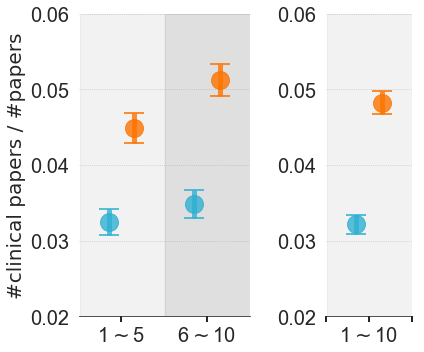

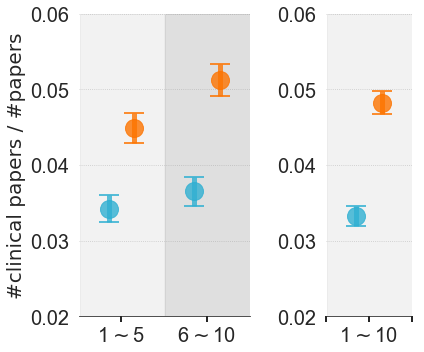

In [26]:
# plot figures
para = read_clinical_data()
para_removal = read_clinical_data_removal()

draw_figures_split_2_new(para)
draw_figures_split_2_new(para_removal)

# comparing near misses with near winners in term of the probability to publish a translational research 

In [27]:
def read_translational_data():

    # hit status for 1-10 years
    df_translational_all = pd.read_csv(PATH_data + 'translational_all.csv', index_col=0)
    translational_status_win_all = df_translational_all[df_translational_all['funding'] == 1].translational.values.tolist()
    translational_status_miss_all = df_translational_all[df_translational_all['funding'] == 0].translational.values.tolist()

    # hit status for 1-5 years
    df_translational_early = pd.read_csv(PATH_data + 'translational_early.csv', index_col=0)
    translational_status_win_early = df_translational_early[df_translational_early['funding'] == 1].translational.values.tolist()
    translational_status_miss_early = df_translational_early[df_translational_early['funding'] == 0].translational.values.tolist()

    # hit status for 6-10 years
    df_translational_late = pd.read_csv(PATH_data + 'translational_late.csv', index_col=0)
    translational_status_win_late = df_translational_late[df_translational_late['funding'] == 1].translational.values.tolist()
    translational_status_miss_late = df_translational_late[df_translational_late['funding'] == 0].translational.values.tolist()

    # statistics for 1-10 years
    ave_translational_win_all = np.mean(translational_status_win_all)
    ave_translational_miss_all = np.mean(translational_status_miss_all)
    std_translational_win_all = np.std(translational_status_win_all) / float(np.sqrt(len(translational_status_win_all)))
    std_translational_miss_all = np.std(translational_status_miss_all) / float(np.sqrt(len(translational_status_miss_all)))

    # statistics for 1-5 years
    ave_translational_win_early = np.mean(translational_status_win_early)
    ave_translational_miss_early = np.mean(translational_status_miss_early)
    std_translational_win_early = np.std(translational_status_win_early) / float(np.sqrt(len(translational_status_win_early)))
    std_translational_miss_early = np.std(translational_status_miss_early) / float(np.sqrt(len(translational_status_miss_early)))

    # statistics for 6-10 years
    ave_translational_win_late = np.mean(translational_status_win_late)
    ave_translational_miss_late = np.mean(translational_status_miss_late)
    std_translational_win_late = np.std(translational_status_win_late) / float(np.sqrt(len(translational_status_win_late)))
    std_translational_miss_late = np.std(translational_status_miss_late) / float(np.sqrt(len(translational_status_miss_late)))

    para = {"ave_translational_win": [ave_translational_win_early, ave_translational_win_late, ave_translational_win_all],
            "ave_translational_miss": [ave_translational_miss_early, ave_translational_miss_late, ave_translational_miss_all],
            "std_translational_win": [std_translational_win_early, std_translational_win_late, std_translational_win_all],
            "std_translational_miss": [std_translational_miss_early, std_translational_miss_late, std_translational_miss_all],
           }
    
    return para


def read_translational_data_removal():
    # hit status for 1-10 years
    df_translational_all = pd.read_csv(PATH_data + 'translational_all_removal.csv', index_col=0)
    translational_status_win_all = df_translational_all[df_translational_all['funding'] == 1].translational.values.tolist()
    translational_status_miss_all = df_translational_all[df_translational_all['funding'] == 0].translational.values.tolist()

    # hit status for 1-5 years
    df_translational_early = pd.read_csv(PATH_data + 'translational_early_removal.csv', index_col=0)
    translational_status_win_early = df_translational_early[df_translational_early['funding'] == 1].translational.values.tolist()
    translational_status_miss_early = df_translational_early[df_translational_early['funding'] == 0].translational.values.tolist()

    # hit status for 6-10 years
    df_translational_late = pd.read_csv(PATH_data + 'translational_late_removal.csv', index_col=0)
    translational_status_win_late = df_translational_late[df_translational_late['funding'] == 1].translational.values.tolist()
    translational_status_miss_late = df_translational_late[df_translational_late['funding'] == 0].translational.values.tolist()
    
    # statistics for 1-10 years
    ave_translational_win_all = np.mean(translational_status_win_all)
    ave_translational_miss_all = np.mean(translational_status_miss_all)
    std_translational_win_all = np.std(translational_status_win_all) / float(np.sqrt(len(translational_status_win_all)))
    std_translational_miss_all = np.std(translational_status_miss_all) / float(np.sqrt(len(translational_status_miss_all)))

    # statistics for 1-5 years
    ave_translational_win_early = np.mean(translational_status_win_early)
    ave_translational_miss_early = np.mean(translational_status_miss_early)
    std_translational_win_early = np.std(translational_status_win_early) / float(np.sqrt(len(translational_status_win_early)))
    std_translational_miss_early = np.std(translational_status_miss_early) / float(np.sqrt(len(translational_status_miss_early)))

    # statistics for 6-10 years
    ave_translational_win_late = np.mean(translational_status_win_late)
    ave_translational_miss_late = np.mean(translational_status_miss_late)
    std_translational_win_late = np.std(translational_status_win_late) / float(np.sqrt(len(translational_status_win_late)))
    std_translational_miss_late = np.std(translational_status_miss_late) / float(np.sqrt(len(translational_status_miss_late)))

    para = {"ave_translational_win": [ave_translational_win_early, ave_translational_win_late, ave_translational_win_all],
            "ave_translational_miss": [ave_translational_miss_early, ave_translational_miss_late, ave_translational_miss_all],
            "std_translational_win": [std_translational_win_early, std_translational_win_late, std_translational_win_all],
            "std_translational_miss": [std_translational_miss_early, std_translational_miss_late, std_translational_miss_all],
           }
    
    return para


def draw_figures_split_2_new(para):

    import matplotlib.gridspec as gridspec

    def _draw_figures_2(pos_x, ave_win, ave_miss, std_win, std_miss, ax):
        """
        local function to draw figures
        """

        def label_diff(i, text, X, Y):
            y = max(Y[0], Y[1])
            ax.text(i, y, text, horizontalalignment='center', fontsize=50)

        ind = np.array([pos_x])  # the x locations for the groups
        ax.errorbar(ind - 0.15, ave_win, yerr=np.array(std_win), alpha=.8, ecolor='#30B0D2', color='#30B0D2', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near win stay')
        ax.errorbar(ind + 0.15, ave_miss, yerr=np.array(std_miss), alpha=.8, ecolor='#FD7400', color='#FD7400', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near miss stay')

        return ax

    def _fig_axis(ax):
        """
        Change figure axis properties.
        """
        ax.tick_params(direction='out', length=6, width=2, labelsize=20)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.yaxis.set_ticks_position('none')
        
        return ax
    
    hfont = {'fontname': 'Helvetica'}
    
    fig = plt.figure(figsize=(6, 5))
    gs2 = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    # ax3 citations from 1-5, 6-10
    ax1 = fig.add_subplot(gs2[0])
    ax1 = _draw_figures_2(1, para['ave_translational_win'][0], para['ave_translational_miss'][0], para['std_translational_win'][0], para['std_translational_miss'][0], ax1)
    ax1 = _draw_figures_2(2, para['ave_translational_win'][1], para['ave_translational_miss'][1], para['std_translational_win'][1], para['std_translational_miss'][1], ax1)
    ax1.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax1.axvspan(1.51, 2.5, alpha=0.25, color='0.5')
    ax1 = _fig_axis(ax1)
    ax1.set_xticks(np.array([1, 2, 3]))
    ax1.set_xticklabels((r'1$\sim$5', r'6$\sim$10'))
    ax1.set_xlim(.5, 2.5)
    ax1.set_ylabel('P(translational papers)', fontsize=20, **hfont)
    ax1.yaxis.grid(True, linestyle=':') 
    ax1.set_ylim(0.26, 0.38)
    
    # ax4 citation from 1-10
    ax2 = fig.add_subplot(gs2[1])
    ax2 = _draw_figures_2(1, para['ave_translational_win'][2], para['ave_translational_miss'][2], para['std_translational_win'][2], para['std_translational_miss'][2], ax2)
    ax2.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax2 = _fig_axis(ax2)
    ax2.set_xlim(.5, 1.5)
    ax2.set_xticklabels(('', r'1$\sim$10'))
    ax2.yaxis.grid(True, linestyle=':')
    gs2.tight_layout(fig, rect=[0, None, 1, None])
    ax2.set_ylim(0.26, 0.38)
    
    return None

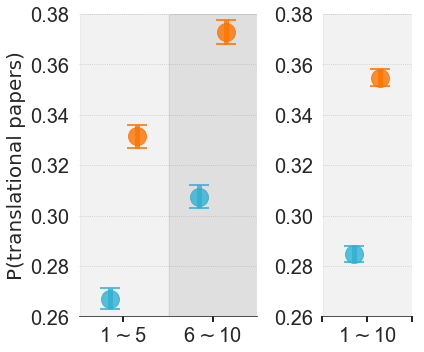

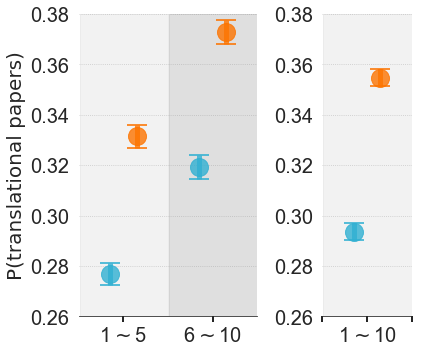

In [28]:
# plot figures
para = read_translational_data()
para_removal = read_translational_data_removal()

draw_figures_split_2_new(para)
draw_figures_split_2_new(para_removal)

# comparing near misses with near winners in terms of publishing a paper that is cited by clinical trials 

In [32]:
def read_cited_by_clinical_data():

    # hit status for 1-10 years
    df_cited_by_clinical_all = pd.read_csv(PATH_data + 'cited_by_clinical_all.csv', index_col=0)
    cited_by_clinical_status_win_all = df_cited_by_clinical_all[df_cited_by_clinical_all['funding'] == 1].CitedbyClinical.values.tolist()
    cited_by_clinical_status_miss_all = df_cited_by_clinical_all[df_cited_by_clinical_all['funding'] == 0].CitedbyClinical.values.tolist()

    # hit status for 1-5 years
    df_cited_by_clinical_early = pd.read_csv(PATH_data + 'cited_by_clinical_early.csv', index_col=0)
    cited_by_clinical_status_win_early = df_cited_by_clinical_early[df_cited_by_clinical_early['funding'] == 1].CitedbyClinical.values.tolist()
    cited_by_clinical_status_miss_early = df_cited_by_clinical_early[df_cited_by_clinical_early['funding'] == 0].CitedbyClinical.values.tolist()

    # hit status for 6-10 years
    df_cited_by_clinical_late = pd.read_csv(PATH_data + 'cited_by_clinical_late.csv', index_col=0)
    cited_by_clinical_status_win_late = df_cited_by_clinical_late[df_cited_by_clinical_late['funding'] == 1].CitedbyClinical.values.tolist()
    cited_by_clinical_status_miss_late = df_cited_by_clinical_late[df_cited_by_clinical_late['funding'] == 0].CitedbyClinical.values.tolist()
    
    # statistics for 1-10 years
    ave_cited_by_clinical_win_all = np.mean(cited_by_clinical_status_win_all)
    ave_cited_by_clinical_miss_all = np.mean(cited_by_clinical_status_miss_all)
    std_cited_by_clinical_win_all = np.std(cited_by_clinical_status_win_all) / float(np.sqrt(len(cited_by_clinical_status_win_all)))
    std_cited_by_clinical_miss_all = np.std(cited_by_clinical_status_miss_all) / float(np.sqrt(len(cited_by_clinical_status_miss_all)))

    # statistics for 1-5 years
    ave_cited_by_clinical_win_early = np.mean(cited_by_clinical_status_win_early)
    ave_cited_by_clinical_miss_early = np.mean(cited_by_clinical_status_miss_early)
    std_cited_by_clinical_win_early = np.std(cited_by_clinical_status_win_early) / float(np.sqrt(len(cited_by_clinical_status_win_early)))
    std_cited_by_clinical_miss_early = np.std(cited_by_clinical_status_miss_early) / float(np.sqrt(len(cited_by_clinical_status_miss_early)))

    # statistics for 6-10 years
    ave_cited_by_clinical_win_late = np.mean(cited_by_clinical_status_win_late)
    ave_cited_by_clinical_miss_late = np.mean(cited_by_clinical_status_miss_late)
    std_cited_by_clinical_win_late = np.std(cited_by_clinical_status_win_late) / float(np.sqrt(len(cited_by_clinical_status_win_late)))
    std_cited_by_clinical_miss_late = np.std(cited_by_clinical_status_miss_late) / float(np.sqrt(len(cited_by_clinical_status_miss_late)))

    para = {"ave_cited_by_clinical_win": [ave_cited_by_clinical_win_early, ave_cited_by_clinical_win_late, ave_cited_by_clinical_win_all],
            "ave_cited_by_clinical_miss": [ave_cited_by_clinical_miss_early, ave_cited_by_clinical_miss_late, ave_cited_by_clinical_miss_all],
            "std_cited_by_clinical_win": [std_cited_by_clinical_win_early, std_cited_by_clinical_win_late, std_cited_by_clinical_win_all],
            "std_cited_by_clinical_miss": [std_cited_by_clinical_miss_early, std_cited_by_clinical_miss_late, std_cited_by_clinical_miss_all],
           }
    
    return para


def read_cited_by_clinical_data_removal():
    # hit status for 1-10 years
    df_cited_by_clinical_all = pd.read_csv(PATH_data + 'cited_by_clinical_all_removal.csv', index_col=0)
    cited_by_clinical_status_win_all = df_cited_by_clinical_all[df_cited_by_clinical_all['funding'] == 1].CitedbyClinical.values.tolist()
    cited_by_clinical_status_miss_all = df_cited_by_clinical_all[df_cited_by_clinical_all['funding'] == 0].CitedbyClinical.values.tolist()

    # hit status for 1-5 years
    df_cited_by_clinical_early = pd.read_csv(PATH_data + 'cited_by_clinical_early_removal.csv', index_col=0)
    cited_by_clinical_status_win_early = df_cited_by_clinical_early[df_cited_by_clinical_early['funding'] == 1].CitedbyClinical.values.tolist()
    cited_by_clinical_status_miss_early = df_cited_by_clinical_early[df_cited_by_clinical_early['funding'] == 0].CitedbyClinical.values.tolist()

    # hit status for 6-10 years
    df_cited_by_clinical_late = pd.read_csv(PATH_data + 'cited_by_clinical_late_removal.csv', index_col=0)
    cited_by_clinical_status_win_late = df_cited_by_clinical_late[df_cited_by_clinical_late['funding'] == 1].CitedbyClinical.values.tolist()
    cited_by_clinical_status_miss_late = df_cited_by_clinical_late[df_cited_by_clinical_late['funding'] == 0].CitedbyClinical.values.tolist()
    
    # statistics for 1-10 years
    ave_cited_by_clinical_win_all = np.mean(cited_by_clinical_status_win_all)
    ave_cited_by_clinical_miss_all = np.mean(cited_by_clinical_status_miss_all)
    std_cited_by_clinical_win_all = np.std(cited_by_clinical_status_win_all) / float(np.sqrt(len(cited_by_clinical_status_win_all)))
    std_cited_by_clinical_miss_all = np.std(cited_by_clinical_status_miss_all) / float(np.sqrt(len(cited_by_clinical_status_miss_all)))

    # statistics for 1-5 years
    ave_cited_by_clinical_win_early = np.mean(cited_by_clinical_status_win_early)
    ave_cited_by_clinical_miss_early = np.mean(cited_by_clinical_status_miss_early)
    std_cited_by_clinical_win_early = np.std(cited_by_clinical_status_win_early) / float(np.sqrt(len(cited_by_clinical_status_win_early)))
    std_cited_by_clinical_miss_early = np.std(cited_by_clinical_status_miss_early) / float(np.sqrt(len(cited_by_clinical_status_miss_early)))

    # statistics for 6-10 years
    ave_cited_by_clinical_win_late = np.mean(cited_by_clinical_status_win_late)
    ave_cited_by_clinical_miss_late = np.mean(cited_by_clinical_status_miss_late)
    std_cited_by_clinical_win_late = np.std(cited_by_clinical_status_win_late) / float(np.sqrt(len(cited_by_clinical_status_win_late)))
    std_cited_by_clinical_miss_late = np.std(cited_by_clinical_status_miss_late) / float(np.sqrt(len(cited_by_clinical_status_miss_late)))

    para = {"ave_cited_by_clinical_win": [ave_cited_by_clinical_win_early, ave_cited_by_clinical_win_late, ave_cited_by_clinical_win_all],
            "ave_cited_by_clinical_miss": [ave_cited_by_clinical_miss_early, ave_cited_by_clinical_miss_late, ave_cited_by_clinical_miss_all],
            "std_cited_by_clinical_win": [std_cited_by_clinical_win_early, std_cited_by_clinical_win_late, std_cited_by_clinical_win_all],
            "std_cited_by_clinical_miss": [std_cited_by_clinical_miss_early, std_cited_by_clinical_miss_late, std_cited_by_clinical_miss_all],
           }
    
    return para


def draw_figures_split_2_new(para):

    import matplotlib.gridspec as gridspec

    def _draw_figures_2(pos_x, ave_win, ave_miss, std_win, std_miss, ax):
        """
        local function to draw figures
        """

        def label_diff(i, text, X, Y):
            y = max(Y[0], Y[1])
            ax.text(i, y, text, horizontalalignment='center', fontsize=50)

        ind = np.array([pos_x])  # the x locations for the groups
        ax.errorbar(ind - 0.15, ave_win, yerr=np.array(std_win), alpha=.8, ecolor='#30B0D2', color='#30B0D2', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near win stay')
        ax.errorbar(ind + 0.15, ave_miss, yerr=np.array(std_miss), alpha=.8, ecolor='#FD7400', color='#FD7400', capthick=2, lw=5, capsize=10, fmt='o', ms=18, label='near miss stay')

        return ax

    def _fig_axis(ax):
        """
        Change figure axis properties.
        """
        ax.tick_params(direction='out', length=6, width=2, labelsize=20)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.yaxis.set_ticks_position('none')
        
        return ax
    
    hfont = {'fontname': 'Helvetica'}
    
    fig = plt.figure(figsize=(6, 5))
    gs2 = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    # ax3 citations from 1-5, 6-10
    ax1 = fig.add_subplot(gs2[0])
    ax1 = _draw_figures_2(1, para['ave_cited_by_clinical_win'][0], para['ave_cited_by_clinical_miss'][0], para['std_cited_by_clinical_win'][0], para['std_cited_by_clinical_miss'][0], ax1)
    ax1 = _draw_figures_2(2, para['ave_cited_by_clinical_win'][1], para['ave_cited_by_clinical_miss'][1], para['std_cited_by_clinical_win'][1], para['std_cited_by_clinical_miss'][1], ax1)
    ax1.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax1.axvspan(1.51, 2.5, alpha=0.25, color='0.5')
    ax1 = _fig_axis(ax1)
    ax1.set_xticks(np.array([1, 2, 3]))
    ax1.set_xticklabels((r'1$\sim$5', r'6$\sim$10'))
    ax1.set_xlim(.5, 2.5)
    ax1.set_ylabel('P(cited_by_clinical papers)', fontsize=20, **hfont)
    ax1.yaxis.grid(True, linestyle=':') 
    ax1.set_ylim(0.27, 0.37)
    
    # ax4 citation from 1-10
    ax2 = fig.add_subplot(gs2[1])
    ax2 = _draw_figures_2(1, para['ave_cited_by_clinical_win'][2], para['ave_cited_by_clinical_miss'][2], para['std_cited_by_clinical_win'][2], para['std_cited_by_clinical_miss'][2], ax2)
    ax2.axvspan(0.51, 1.5, alpha=0.1, color='0.5')
    ax2 = _fig_axis(ax2)
    ax2.set_xlim(.5, 1.5)
    ax2.set_xticklabels(('', r'1$\sim$10'))
    ax2.yaxis.grid(True, linestyle=':')
    gs2.tight_layout(fig, rect=[0, None, 1, None])
    ax2.set_ylim(0.27, 0.37)
    
    return None

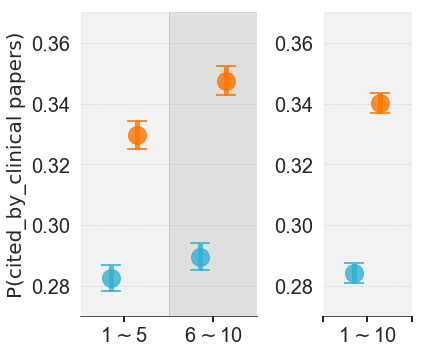

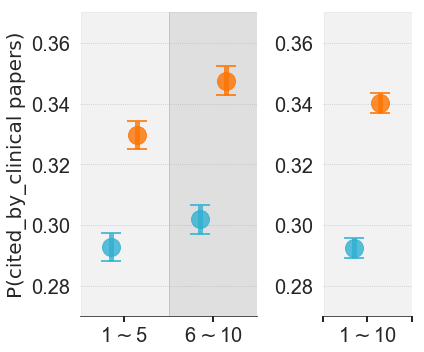

In [33]:
# plot figures
para = read_cited_by_clinical_data()
para_removal = read_cited_by_clinical_data_removal()

draw_figures_split_2_new(para)
draw_figures_split_2_new(para_removal)